In [ ]:
import yfinance as yf
import pandas as pd

# Download data for IVV from January 1, 2025 to January 31, 2025
ticker = yf.Ticker('IVV')
ivv_data = ticker.history(start='2025-01-01', end='2025-01-31')

# Ensure the data frame contains the Date, Open, High, Low, Close prices, and Volume
ivv_data = ivv_data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Create a new DataFrame and import everything from ivv_data
df = pd.DataFrame(ivv_data)

# Next Step Below 

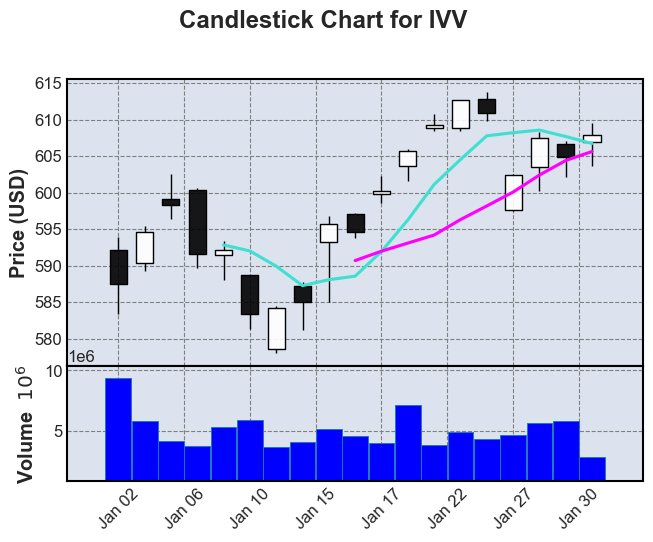

In [64]:
import mplfinance as mpf
import matplotlib.pyplot as plt
  
# fig, ax = mpf.plot(df, type='candle', style='charles', title='Candlestick Chart for IVV',
                   # ylabel='Price (USD)', volume=True, mav=(5, 10), returnfig=True)

# Move the volume y-axis label to the left
# ax[2].yaxis.set_label_position('left')
# ax[2].yaxis.tick_left()

# ax[0].yaxis.set_label_position('left')
# ax[0].yaxis.tick_left()

# plt.show()

# Define custom market colors for black and white style
mc = mpf.make_marketcolors(
    up='white',       # white fill for "up" candles
    down='black',     # black fill for "down" candles
    edge={'up': 'black', 'down': 'black'},   # black edges
    wick={'up': 'black', 'down': 'black'},   # black wicks
    volume={'up': 'blue', 'down': 'blue'}  # black volume bars
)

# Define custom style with black and white colors
my_style = mpf.make_mpf_style(
    base_mpf_style='default',
    marketcolors=mc,
    rc={
        'axes.facecolor': 'white',   # white background for the plot
        'figure.facecolor': 'white'  # white background for the figure
    },
    gridcolor='gray',    # gray grid lines
    gridstyle='--'       # dashed grid lines
)

# Plot candlestick chart with custom style
fig, ax = mpf.plot(df, type='candle', style=my_style, title='Candlestick Chart for IVV',
                   ylabel='Price (USD)', volume=True, mav=(5, 10), returnfig=True)

# Move the volume y-axis label to the left
ax[2].yaxis.set_label_position('left')
ax[2].yaxis.tick_left()

# Move the price y-axis label to the left
ax[0].yaxis.set_label_position('left')
ax[0].yaxis.tick_left()

plt.show()


